In [1]:
import pandas as pd

Loading dataset

In [2]:
df_train = pd.read_feather("../../../data/processed/CLTP_train_set.feather")

In [3]:
df_train.shape

(925810, 193)

In [4]:
df_train.head()

,ORIGEN,SEXO,TIPO_PERSONA,CLIENTE,ANO_DE_NACIMIENTO,FECHA_NACIMIENTO,ESTADO_CIVIL,DATECO_TRABAJA,DATECO_AUTONOMO,DATECO_RAZON_SOCIAL_EMPLEADOR,...,diff_cant_polizas_4,diff_cant_int_4,diff_cant_polizas_3,diff_cant_int_3,diff_cant_polizas_2,diff_cant_int_2,diff_cant_polizas_1,diff_cant_int_1,CLTP,time_window
0,082,M,F,None,1953.0,26/10/1953,Casado,None,None,None,...,0.0,4.0,0.0,-3.0,0.0,-1.0,0.0,0.0,0,1 a 6
1,082,M,F,None,1954.0,11/10/1954,Soltero,None,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1 a 6
2,082,M,F,None,1956.0,29/11/1956,Casado,None,None,None,...,0.0,2.0,0.0,-1.0,0.0,-5.0,0.0,4.0,0,1 a 6
3,082,F,F,None,1931.0,18/06/1931,Viudo,None,None,None,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0,1 a 6
4,082,M,F,None,1964.0,06/11/1964,Divorciado,None,None,None,...,0.0,0.0,0.0,3.0,0.0,-2.0,0.0,0.0,0,1 a 6


In [5]:
X_train = df_train.drop(["CLTP"], axis=1)
y_train = df_train["CLTP"]
del df_train

In [6]:
y_train.value_counts(normalize=True)

0    0.879998
1    0.022908
2    0.021454
3    0.020937
4    0.019989
5    0.018086
6    0.016629
Name: CLTP, dtype: float64

## Training

In [7]:
from sklearn.utils.class_weight import compute_class_weight 

In [8]:
cw = compute_class_weight("balanced", sorted(y_train.unique()), y_train)
cw

array([0.16233802, 6.23625855, 6.65887481, 6.82307942, 7.14679409,
       7.89886356, 8.59100821])

In [9]:
weights = {i:val for i,val in enumerate(cw * (1/cw[0]))}

In [10]:
weights

{0: 1.0,
 1: 38.41526782346285,
 2: 41.0185781895076,
 3: 42.030076351630214,
 4: 44.02415432832595,
 5: 48.656892021022465,
 6: 52.92049366677493}

In [11]:
weights = {i:50 for i,val in enumerate(cw)} 
weights[0] = 1

Dummify 

In [12]:
X_train = X_train.drop(["DATECO_RAZON_SOCIAL_EMPLEADOR","FECHA_NACIMIENTO","time_window"], axis=1)

In [13]:
X_train = pd.get_dummies(X_train)

In [14]:
X_train = X_train.fillna(-999)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight=weights, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100

building tree 5 of 100building tree 6 of 100
building tree 7 of 100


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


RandomForestClassifier(bootstrap=True,
            class_weight={0: 1, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=2, warm_start=False)

Dump training columns

In [21]:
cols = list(X_train.columns)

In [22]:
import pickle
with open('../../../src/models/Training columns - CLTP - Primer modelo basico - dummies.md', 'wb') as file:
    pickle.dump(cols, file, pickle.HIGHEST_PROTOCOL)

### Feature importance

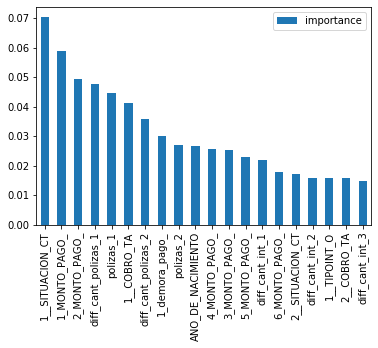

In [17]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns, columns=['importance']
                                   ).sort_values('importance', ascending=False).iloc[0:20].plot.bar()

### Validation Dataset

In [18]:
df_val = pd.read_feather("../../../data/processed/CLTP_optimization_set.feather")

In [19]:
df_val.shape

(308355, 193)

In [20]:
df_val.head()

,ORIGEN,SEXO,TIPO_PERSONA,CLIENTE,ANO_DE_NACIMIENTO,FECHA_NACIMIENTO,ESTADO_CIVIL,DATECO_TRABAJA,DATECO_AUTONOMO,DATECO_RAZON_SOCIAL_EMPLEADOR,...,diff_cant_polizas_4,diff_cant_int_4,diff_cant_polizas_3,diff_cant_int_3,diff_cant_polizas_2,diff_cant_int_2,diff_cant_polizas_1,diff_cant_int_1,CLTP,time_window
0,082,M,F,None,1953.0,26/10/1953,Casado,None,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,4 a 9
1,082,M,F,None,1954.0,11/10/1954,Soltero,None,None,None,...,0.0,1.0,0.0,-1.0,0.0,2.0,0.0,-1.0,0,4 a 9
2,082,M,F,None,1956.0,29/11/1956,Casado,None,None,None,...,0.0,4.0,0.0,4.0,0.0,-7.0,0.0,0.0,0,4 a 9
3,082,F,F,None,1931.0,18/06/1931,Viudo,None,None,None,...,0.0,3.0,0.0,-2.0,0.0,10.0,0.0,-12.0,0,4 a 9
4,082,M,F,None,1964.0,06/11/1964,Divorciado,None,None,None,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,0,4 a 9


In [21]:
df_val['CLTP'].value_counts()

0    273211
3      6615
1      6573
2      6225
6      5575
4      5316
5      4840
Name: CLTP, dtype: int64

### Model metrics

In [22]:
from sklearn.metrics import mean_squared_error,roc_auc_score,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [23]:
X_val = df_val.drop(["CLTP"], axis=1)
y_val = df_val["CLTP"]
del df_val

In [24]:
X_val = X_val.drop(["DATECO_RAZON_SOCIAL_EMPLEADOR","FECHA_NACIMIENTO","time_window"], axis=1)
X_val = pd.get_dummies(X_val)
X_val = X_val.fillna(-999)

In [25]:
for col in [col for col in X_train.columns if col not in X_val.columns]:
    X_val[col] = -999

In [26]:
X_val = X_val.drop([col for col in X_val.columns if col not in X_train.columns], axis=1)

In [27]:
y_val.value_counts()

0    273211
3      6615
1      6573
2      6225
6      5575
4      5316
5      4840
Name: CLTP, dtype: int64

In [28]:
predictions = rf.predict(X_val)
pd.Series(predictions).value_counts()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.6s finished


0    289158
1      6724
2      6714
3      5757
4         2
dtype: int64

In [29]:
import seaborn as sns

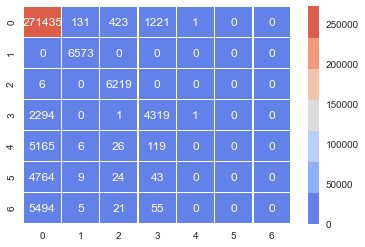

In [30]:
cmap = sns.color_palette("coolwarm", 7)
sns.set(font_scale=1)
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt="d", linewidths=.5, cmap=cmap) 

C:\Users\Santi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


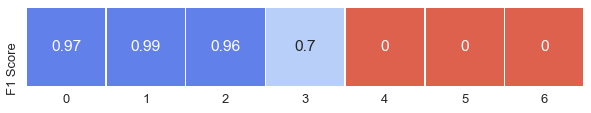

In [31]:
data = pd.DataFrame(columns=range(7), data=[f1_score(y_val, predictions, average=None)])
data.index = ["F1 Score"]
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)
cmap = sns.color_palette("coolwarm_r", 7)
sns.heatmap(data, annot=True, linewidths=.5, cmap=cmap, square=True, cbar=False)

In [32]:
pd.crosstab(y_val, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,271435,131,423,1221,1,273211
1,0,6573,0,0,0,6573
2,6,0,6219,0,0,6225
3,2294,0,1,4319,1,6615
4,5165,6,26,119,0,5316
5,4764,9,24,43,0,4840
6,5494,5,21,55,0,5575
All,289158,6724,6714,5757,2,308355


#### Dumping model

In [31]:
import pickle

In [ ]:
with open('../../src/models/Primer modelo basico - dummies.md', 'wb') as file:
    pickle.dump(rf, file, pickle.HIGHEST_PROTOCOL)